In [99]:
# ! pip install tensorflow 

In [1]:
import pandas as pd
import numpy as np
import json
import re
from tqdm.notebook import tqdm
import pymongo
from collections import Counter
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import defaultdict
import tensorflow as tf


In [3]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
# conncet to DB
myclient = pymongo.MongoClient("mongodb://localhost:27017/") 
mydb = myclient["bdt_db"] 
mycol = mydb["birth_tweets"] 


In [7]:
# read all the tweets text of the database
tweets = [t["text"] for t in mycol.find({})]

In [8]:
# put all twets on one string
raw_text = "\n".join(tweets)
print(len(raw_text))

50337742


In [9]:
tweets[10000]

'Such a Beautiful Baby!!! Merry First Christmas little Guy!!!💞👼🎅🎄🎁🕯💞⚘ https://t.co/o7NXfkCMYe'

In [10]:
# cleaning the text 
text = re.sub(r"http\S+",'', tweets[1000], flags=re.MULTILINE)
text = re.sub(r"[^A-Za-z0-9'\ ]+", '', text) 
text

'OMG  Congrats to you and taylorgiavasis Welcome to the world to your baby boy God bless you and your family   '

In [11]:
# word counter and lowecasing 
word_counter = Counter() 
for tweet in tqdm(tweets):
    tweet = re.sub(r"http\S+",'', tweet, flags=re.MULTILINE)
    tweet = re.sub(r"[^A-Za-z0-9'\ ]+", '', tweet) 
    word_counter.update(tweet.lower().split())


In [12]:
word_counter.most_common(30)

[('baby', 277831),
 ('a', 213157),
 ('to', 208922),
 ('my', 204326),
 ('the', 167531),
 ('and', 164308),
 ('i', 158567),
 ('is', 101985),
 ('first', 87601),
 ('for', 85206),
 ('of', 75569),
 ('welcome', 69064),
 ('in', 66825),
 ('soon', 65324),
 ('coming', 65213),
 ('so', 63610),
 ('be', 62025),
 ('newborn', 58785),
 ('have', 52696),
 ('this', 51870),
 ('having', 49068),
 ('her', 47895),
 ('you', 47324),
 ('with', 46826),
 ('im', 46534),
 ('new', 43864),
 ('on', 42317),
 ('me', 40031),
 ('been', 37824),
 ('becoming', 37294)]

In [13]:
# remove stopwords
for word in stopwords.words("english"):
    del word_counter[word]

In [14]:
word_counter.most_common(30)

[('baby', 277831),
 ('first', 87601),
 ('welcome', 69064),
 ('soon', 65324),
 ('coming', 65213),
 ('newborn', 58785),
 ('im', 46534),
 ('new', 43864),
 ('becoming', 37294),
 ('mom', 37285),
 ('going', 33472),
 ('pregnant', 30975),
 ('girl', 30104),
 ('love', 29855),
 ('time', 27378),
 ('babies', 25171),
 ('amp', 24840),
 ('born', 24563),
 ('day', 23581),
 ('boy', 23188),
 ('happy', 23030),
 ('like', 21689),
 ("i'm", 20619),
 ('little', 18558),
 ('today', 18266),
 ('family', 18145),
 ('one', 16985),
 ('back', 14952),
 ('world', 14930),
 ('home', 14695)]

In [49]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=10, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate_from_frequencies(word_counter)

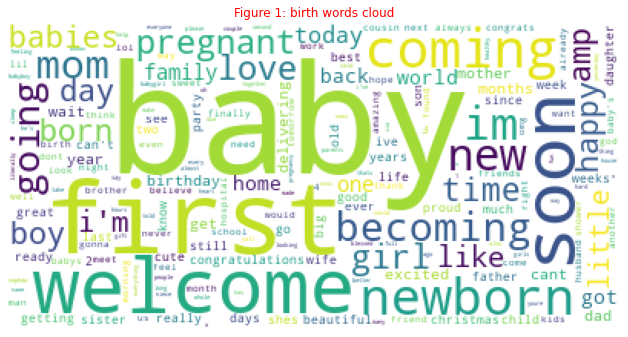

In [51]:
# Visualize the word cloud
plt.figure(1,figsize=(11, 11))
plt.imshow(wordcloud.to_image())
plt.axis('off')
plt.title('Figure 1: birth words cloud',color="red" )
 
plt.show()


In [79]:
# top 256 key words
# word_counter.most_common(256)


In [82]:
frequent_words = [item[0] for item in word_counter.most_common(256)]
# print(frequent_words)

In [94]:
word2index = {frequent_words[i]:i for i in range(len(frequent_words))}
print(word2index)

{'baby': 0, 'first': 1, 'welcome': 2, 'soon': 3, 'coming': 4, 'newborn': 5, 'im': 6, 'new': 7, 'becoming': 8, 'mom': 9, 'going': 10, 'pregnant': 11, 'girl': 12, 'love': 13, 'time': 14, 'babies': 15, 'amp': 16, 'born': 17, 'day': 18, 'boy': 19, 'happy': 20, 'like': 21, "i'm": 22, 'little': 23, 'today': 24, 'family': 25, 'one': 26, 'back': 27, 'world': 28, 'home': 29, 'got': 30, 'birthday': 31, 'year': 32, 'cant': 33, 'wait': 34, 'delivering': 35, 'get': 36, 'mother': 37, 'excited': 38, 'months': 39, 'dad': 40, 'congratulations': 41, 'best': 42, 'beautiful': 43, 'see': 44, 'old': 45, 'weeks': 46, 'much': 47, 'really': 48, 'father': 49, '2': 50, 'life': 51, 'good': 52, 'christmas': 53, 'know': 54, 'since': 55, 'years': 56, 'still': 57, 'proud': 58, 'wife': 59, 'son': 60, 'days': 61, 'ready': 62, 'ever': 63, 'great': 64, 'last': 65, '3': 66, 'sister': 67, 'cute': 68, 'go': 69, 'week': 70, 'getting': 71, 'party': 72, 'daughter': 73, 'two': 74, 'child': 75, 'big': 76, 'shes': 77, 'ive': 78, 

In [88]:
months  = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
 'September', 'October', 'November', 'December']



In [231]:
# get array of keywords counts for each months
months_keywords_count = defaultdict(lambda: np.zeros(len(word2index)))
num_tweets_perMonth = defaultdict(int)
for tweet in tqdm(mycol.find({}),total = len(tweets)):
#     if tweet["location"].lower() == "italy" or tweet["location"].lower() == "it":
        time = tweet["time"]
        year,month,date = time.split("-")
        month = int(month)-1
        month_name = months[month]
        month = "{}_{}".format(year,month_name)
        num_tweets_perMonth[month] += 1
        for word , index in word2index.items():
            count = tweet["text"].count(word)
            months_keywords_count[month][index] += count


In [232]:
print(num_tweets_perMonth)

defaultdict(<class 'int'>, {'2021_June': 73, '2021_July': 435, '2020_December': 54438, '2020_November': 39522, '2020_October': 29365, '2020_September': 14388, '2020_August': 13135, '2020_July': 13003, '2020_June': 11472, '2020_May': 14168, '2020_April': 9079, '2020_March': 5636, '2020_February': 5037, '2020_January': 5777, '2019_December': 5574, '2019_November': 5018, '2019_October': 5310, '2019_September': 5362, '2019_August': 4604, '2019_July': 4040, '2019_June': 3972, '2019_May': 4642, '2019_April': 3875, '2019_March': 3584, '2019_February': 2342, '2019_January': 2621, '2018_December': 2590, '2018_November': 2220, '2018_October': 2569, '2018_August': 2969, '2018_July': 2901, '2018_February': 2103, '2018_September': 2587, '2018_June': 2103, '2018_April': 2353, '2018_March': 2415, '2018_May': 2070, '2018_January': 2102, '2017_December': 1939, '2017_November': 1835, '2017_October': 1693, '2017_September': 1934, '2017_August': 2002, '2017_July': 1976, '2017_June': 2003, '2017_May': 2113

In [233]:
list(months_keywords_count.items())[1]

('2021_July',
 array([ 74.,  21.,   8.,  47.,  38.,   1.,  42.,  26.,   0.,   6.,   8.,
        156.,  29.,  14.,  14.,   8.,  15.,   1.,  36.,  10.,  13.,   9.,
          3.,   6.,   4.,  24.,  21.,  10.,   3.,   6.,   9.,   1.,  11.,
          0.,   7.,   0.,  30.,   0.,   4.,  41.,   2.,   2.,   7.,  13.,
          9.,  14.,  45.,   2.,   6.,   1.,  93.,   7.,   3.,   0.,   3.,
          5.,   2.,   6.,   5.,   4.,  14.,   6.,   3.,  10.,   3.,   6.,
        145.,   5.,   2.,  47.,  53.,   5.,   0.,  29.,  12.,  16.,   3.,
          0.,  37.,   2.,   2.,   2.,  50.,   1.,  24.,   2.,   4.,  11.,
         29.,   6.,   1.,   6.,   0.,   0.,  10.,   1., 123.,   4.,   1.,
          4.,   5.,   5.,   6.,   3.,   8.,   4.,  10.,   6.,   4.,   2.,
          1.,   1.,   3.,  13.,   3.,   1.,   4.,   0.,   0.,  44.,   9.,
          2.,   4.,   3.,   1.,   2.,   4.,   9.,  27.,   2.,  33.,   1.,
         10., 894.,   3.,  42., 132.,   2.,   9.,  10.,   1.,   1.,   3.,
          0.,   1.,  10.

In [234]:
df = pd.read_csv("demo_fmonth/demo_fmonth_1_Data.csv")
# change the string type to float and replace Null value with 0
df.Value = df.Value.apply(lambda x: 0 if x == ":" else float(x.replace(",","")))
df.head()

,TIME,GEO,MONTH,UNIT,Value,Flag and Footnotes
0,2011,Belgium,January,Number,10759.0,NaN
1,2011,Belgium,February,Number,9739.0,NaN
2,2011,Belgium,March,Number,10725.0,NaN
3,2011,Belgium,April,Number,10268.0,NaN
4,2011,Belgium,May,Number,11116.0,NaN


In [235]:
df[df.GEO=="Italy"].head()

,TIME,GEO,MONTH,UNIT,Value,Flag and Footnotes
156,2011,Italy,January,Number,45021.0,NaN
157,2011,Italy,February,Number,41862.0,NaN
158,2011,Italy,March,Number,45946.0,NaN
159,2011,Italy,April,Number,39395.0,NaN
160,2011,Italy,May,Number,45619.0,NaN


In [236]:
# (df[df.GEO=="Italy"].Value==0).sum()

In [237]:
# total birth of each month of country 
monthly_birth_rate = defaultdict(int)
for index, row in df.iterrows():
#     if row["GEO"].lower() == "italy":
        month = "{}_{}".format(row["TIME"],row["MONTH"])
        monthly_birth_rate[month] += row['Value']
list(monthly_birth_rate.items())[0]

('2011_January', 911256.0)

In [238]:
# put the months of each year in order 
ordered_months = []
for year in range(2011,2022):
    for m in range(len(months)):
        month_name = months[m]
        month = "{}_{}".format(year,month_name)
        # select only months exist in both data
        if month in num_tweets_perMonth and month in monthly_birth_rate:
            ordered_months.append(month) 
# ordered_months

<BarContainer object of 120 artists>

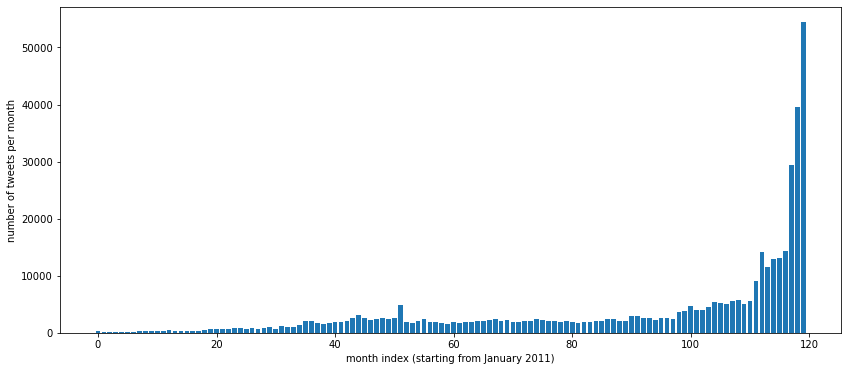

In [239]:
# show the number of tweets each month 
x = ordered_months
height = [num_tweets_perMonth[month] for month in x]
plt.figure(figsize=(14,6))
plt.xlabel("month index (starting from January 2011)")
plt.ylabel("number of tweets per month")
plt.bar(x = list(range( len(x))),height = height)


<BarContainer object of 120 artists>

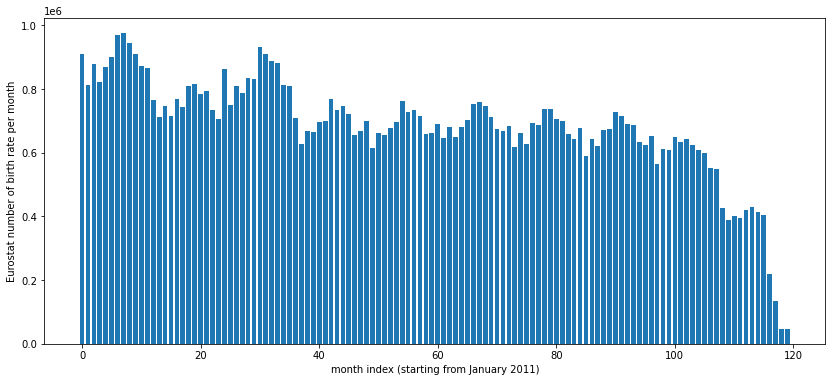

In [240]:
# show the number of tweets each month 
x = ordered_months
height = [monthly_birth_rate[month] for month in x]
plt.figure(figsize=(14,6))
plt.xlabel("month index (starting from January 2011)")
plt.ylabel("Eurostat number of birth rate per month")
plt.bar(x = list(range( len(x))),height = height)

In [241]:
# keyword counts of tweets in DB = ordered by month
ordered_monthly_keywordsCounts = np.stack([months_keywords_count[m]/num_tweets_perMonth[m] for m in ordered_months])
# birth rate of each month eurostatdata = ordered by mont 
ordered_monthly_birthRates = np.stack([monthly_birth_rate[m] for m in ordered_months])

In [242]:
# ordered_monthly_keywordsCounts[0]
# ordered_monthly_birthRates[0]
print(ordered_monthly_keywordsCounts.shape)
print(ordered_monthly_birthRates.shape)
print(ordered_monthly_keywordsCounts.max())
print(ordered_monthly_keywordsCounts.min())
print(ordered_monthly_birthRates.max())
print(ordered_monthly_birthRates.min())

(120, 256)
(120,)
2.7851964898893553
0.0
975710.0
45067.0


In [243]:
x_train,x_test,y_train,y_test = train_test_split(ordered_monthly_keywordsCounts,ordered_monthly_birthRates)

In [244]:
# serch paramter 
parameters = {
    "kernel": ["rbf","linear"],
    "C": [1,10,10,100,1000],
    "gamma": [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1,10,100]
    }

grid = GridSearchCV(SVR(), parameters,scoring="neg_mean_absolute_error", cv=5, verbose=2)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 110 candidates, totalling 550 fits
[CV] C=1, gamma=1e-08, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-08, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-08, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-08, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-08, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-08, kernel=linear .................................
[CV] .................. C=1, gamma=1e-08, kernel=linear, total=   0.0s
[CV] C=1, gamma=1e-08, kernel=linear .................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1, gamma=1e-06, kernel=linear, total=   0.0s
[CV] C=1, gamma=1e-06, kernel=linear .................................
[CV] .................. C=1, gamma=1e-06, kernel=linear, total=   0.0s
[CV] C=1, gamma=1e-06, kernel=linear .................................
[CV] .................. C=1, gamma=1e-06, kernel=linear, total=   0.0s
[CV] C=1, gamma=1e-05, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-05, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-05, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-05, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-05, kernel=rbf ....................................
[CV] .

[CV] ........................ C=1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........................ C=1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........................ C=1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV] ..................... C=1, gamma=10, kernel=linear, total=   0.0s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV] ..................... C=1, gamma=10, kernel=linear, total=   0.0s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV] ..................... C=1, gamma=10, kernel=linear, total=   0.0s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV] ..................... C=1, gamma=10, kernel=linear, total=   0.0s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV] .

[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .

[CV] ................. C=10, gamma=1e-08, kernel=linear, total=   0.0s
[CV] C=10, gamma=1e-08, kernel=linear ................................
[CV] ................. C=10, gamma=1e-08, kernel=linear, total=   0.0s
[CV] C=10, gamma=1e-08, kernel=linear ................................
[CV] ................. C=10, gamma=1e-08, kernel=linear, total=   0.0s
[CV] C=10, gamma=1e-08, kernel=linear ................................
[CV] ................. C=10, gamma=1e-08, kernel=linear, total=   0.0s
[CV] C=10, gamma=1e-08, kernel=linear ................................
[CV] ................. C=10, gamma=1e-08, kernel=linear, total=   0.0s
[CV] C=10, gamma=1e-07, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-07, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-07, kernel=rbf ...................................
[CV] .

[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .

[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] .................. C=1000, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1e-07, kernel=linear ..............................
[CV] ............... C=1000, gamma=1e-07, kernel=linear, total=   0.0s
[CV] C=1000, gamma=1e-07, kernel=linear ..............................
[CV] ............... C=1000, gamma=1e-07, kernel=linear, total=   0.0s
[CV] C=1000, gamma=1e-07, kernel=linear ..............................
[CV] ............... C=1000, gamma=1e-07, kernel=linear, total=   0.0s
[CV] C=1000, gamma=1e-07, kernel=linear ..............................
[CV] ............... C=1000, gamma=1e-07, kernel=linear, total=   0.0s
[CV] C=1000, gamma=1e-07, kernel=linear ..............................
[CV] ............... C=1000, gamma=1e-07, kernel=linear, total=   0.0s
[CV] C=1000, gamma=1e-06, kernel=rbf .................................
[CV] .................. C=1000, gamma=1e-06, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1e-06, kernel=rbf .................................
[CV] .

[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 550 out of 550 | elapsed:    4.8s finished


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 10, 100, 1000],
                         'gamma': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'linear']},
             scoring='neg_mean_absolute_error', verbose=2)

In [245]:
print(grid.best_params_)

{'C': 1000, 'gamma': 1e-08, 'kernel': 'linear'}


In [246]:
# kernal SVM 
regr = SVR(C=1000, kernel= "linear" ,gamma = 1e-08)
regr.fit(x_train, y_train)

SVR(C=1000, gamma=1e-08, kernel='linear')

In [247]:
train_pred = regr.predict(x_train)
print(mean_absolute_error(train_pred,y_train))

91773.82269389431


In [248]:
test_pred = regr.predict(x_test)
print(mean_absolute_error(test_pred,y_test))

118610.79232398058


In [249]:
data = pd.DataFrame(dict(actual = y_test,predicted = test_pred))

In [253]:
data.head()


,actual,predicted
0,661966.0,696954.265276
1,677143.0,687836.341439
2,419181.0,689541.055277
3,132973.0,697063.919271
4,975710.0,713735.894078
